<a href="https://colab.research.google.com/github/RishiMishra06/Clustering_Project/blob/main/Rishi_Clustering_Online_Retail_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJECT NAME**    -  ONLINE RETAIL DATA CLUSTERING PROJECT

---








# PROJECT TYPE-:        Unsupervised


# AUTHOR - Rishi Mishra

* 🔗 LinkedIn - https://www.linkedin.com/in/rishimishra-technology



* Github - https://github.com/RishiMishra06




# **Project Summary -**

This project revolves around the "Online Retail" dataset, which captures detailed transaction records from a UK-based online store between 2010 and 2011. With over 500,000 entries, the data includes everything from invoice numbers and product descriptions to quantities, prices, customer IDs, and countries. The main aim is to dive deep into this rich dataset to understand how customers behave—how often they buy, how much they spend, and what patterns emerge from their shopping habits. By analyzing factors like purchase frequency and total spend, we hope to uncover natural groupings or segments among customers. These insights can be incredibly valuable for businesses looking to tailor their marketing, improve customer engagement, and make smarter decisions. Before jumping into any machine learning, the data goes through important steps like cleaning, handling missing values, and building useful features to ensure it’s ready for clustering and deeper analysis.



# **GitHub Link -**

https://github.com/RishiMishra06

# **Problem Statement**

The goal of this project is to understand and segment customers based on how they shop, using the Online Retail dataset. We start with raw transaction records and turn them into meaningful, customer-level insights—going beyond what simple analysis can reveal. By applying clustering techniques, we aim to group together customers with similar buying patterns. These insights can help businesses tailor their marketing, improve how they retain customers, and make smarter, data-driven decisions. The project involves cleaning the data, creating useful features, and applying unsupervised machine learning methods to uncover these hidden customer segments.



## <b>In this  project, you are required to do </b>
a complete customer segmentation analysis using the Online Retail dataset. This involves reading and understanding the transactional data, performing thorough data cleaning and preprocessing, engineering key customer features such as Recency, Frequency, and Monetary value, and applying various clustering algorithms including KMeans, Hierarchical Clustering, DBSCAN, and others. The goal is to identify meaningful customer groups based on their purchasing behavior, visualize these clusters, and interpret the business significance of each segment. This project will help demonstrate how unsupervised learning techniques can be effectively used in real-world retail analytics.





# **Attribute Information**

**Description** of the key attributes in the Online Retail dataset:

InvoiceNo: A unique identifier assigned to each transaction (Invoice). It may also contain credit memos (returns), indicated by invoices that start with 'C'.

StockCode: A unique code assigned to each product/item.

Description: A brief description or name of the product/item.

Quantity: The number of units of the product sold in each transaction. Negative values may represent product returns.

InvoiceDate: The date and time when the invoice was generated.

UnitPrice: The price per item/unit (in Pounds Sterling).

CustomerID: A unique identifier for each customer. Missing values in this field indicate anonymous or unknown customers.

Country: The name of the country where the customer is located.



### Import Libraries

In [9]:
# import the dependancy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm
import scipy.cluster.hierarchy as sch
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Import and read the data

In [10]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
df=pd.read_excel('/content/drive/MyDrive/Copy of Online Retail.xlsx')
df.head(15)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [14]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


# dataset shape

In [15]:
# Check the shape of the dataset
df.shape

(541909, 8)

# dataset information

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


# Data description

In [17]:
#To check distribution describing dataset
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


# checking null values

In [18]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


<Axes: >

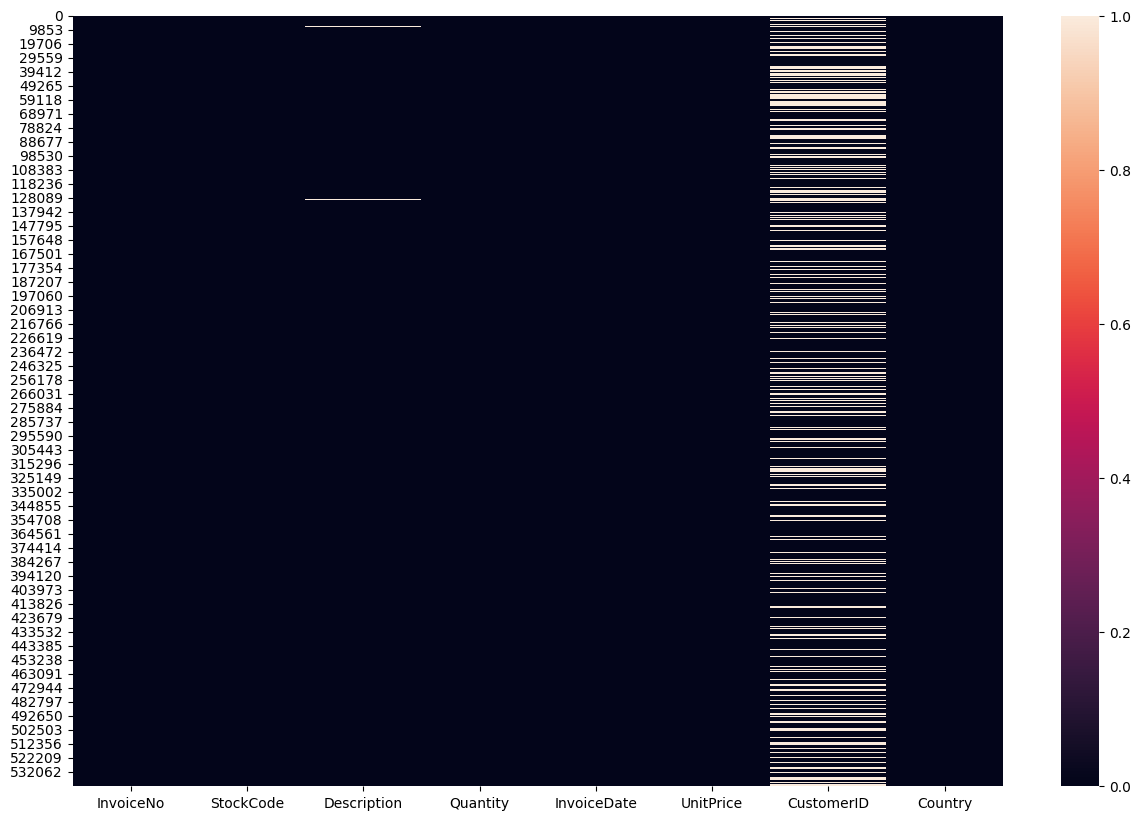

In [19]:
# let's visualizing  the null values
plt.figure(figsize=(15,10))
sns.heatmap(df.isna())

as we can see customer id has highest null values in the  dataset



---



# **DATA WRANGLING**




#### Null value treatment

In [20]:
# Drop rows with missing CustomerID
df = df.dropna(subset=['CustomerID'])

# Drop rows with missing Description (optional for clustering)
df = df.dropna(subset=['Description'])

# Reset index after drops
df.reset_index(drop=True, inplace=True)
X = df.select_dtypes(include='number')

CHECKING DUPLICATED VALUES

In [21]:
df.duplicated().sum()

np.int64(5225)

WHAT DID YOU KNOW ABOUT YOUR DATASET

1 - Data Overview
The dataset contains 541,909 rows and 8 columns.

The dataset includes both numerical and categorical features:

6 object columns: InvoiceNo, StockCode, Description, InvoiceDate, CustomerID, Country

2 numerical columns: Quantity, UnitPrice

2 - Checking the Null Values
We have 1454 null values in the Description column — this is less than 0.3%, so these rows can be dropped without significant loss.

There are 135,080 null values in the CustomerID column — this is around 25% of the data. Since CustomerID is essential for customer-level clustering (RFM), these rows should be removed.

All other columns have no missing values.

3 - Check Duplicate Values in the Dataset
Duplicate check shows that there are duplicates in the dataset. These should be removed to avoid misleading frequency or monetary calculations during clustering.

# ***3. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

ANALYSIS TYPE COLUMN

In [22]:
print(df['Country'].value_counts().head(5))             # Top purchasing countries
print(df['StockCode'].value_counts().head(10))  # Top 10 purchased items
print(df['Description'].value_counts().head(10)) # Common product names


Country
United Kingdom    361878
Germany             9495
France              8491
EIRE                7485
Spain               2533
Name: count, dtype: int64
StockCode
85123A    2077
22423     1905
85099B    1662
84879     1418
47566     1416
20725     1359
22720     1232
POST      1196
20727     1126
22197     1118
Name: count, dtype: int64
Description
WHITE HANGING HEART T-LIGHT HOLDER    2070
REGENCY CAKESTAND 3 TIER              1905
JUMBO BAG RED RETROSPOT               1662
ASSORTED COLOUR BIRD ORNAMENT         1418
PARTY BUNTING                         1416
LUNCH BAG RED RETROSPOT               1358
SET OF 3 CAKE TINS PANTRY DESIGN      1232
POSTAGE                               1196
LUNCH BAG  BLACK SKULL.               1126
PACK OF 72 RETROSPOT CAKE CASES       1080
Name: count, dtype: int64


# top 10 most ordered products

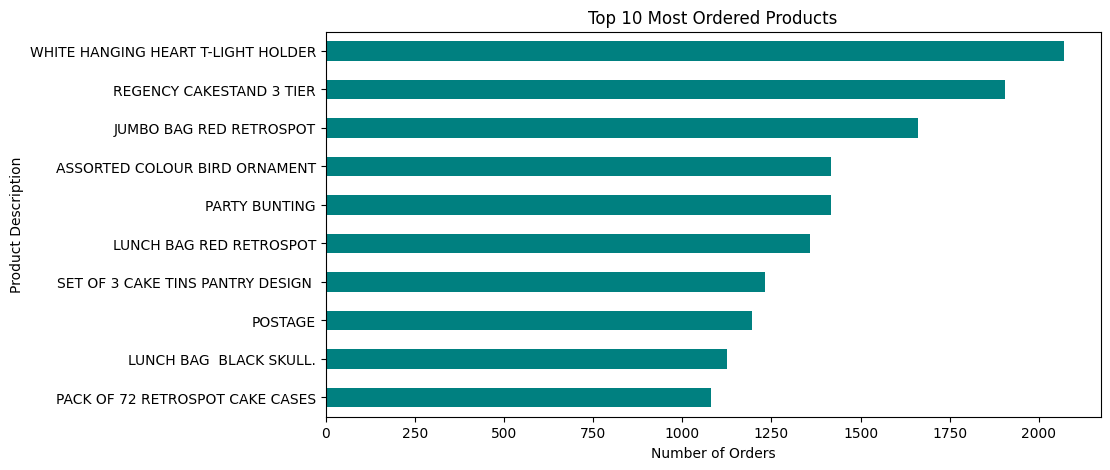

In [23]:
top_products = df['Description'].value_counts().head(10)
top_products.plot(kind='barh', figsize=(10,5), color='teal')
plt.title('Top 10 Most Ordered Products')
plt.xlabel('Number of Orders')
plt.ylabel('Product Description')
plt.gca().invert_yaxis()
plt.show()

Insight:
These are the products with the highest sales volume where white hanging heart t-light holder is most ordered product.
: Businesses can focus marketing and inventory strategies around them by these analysis
.



# Country-wise transaction count

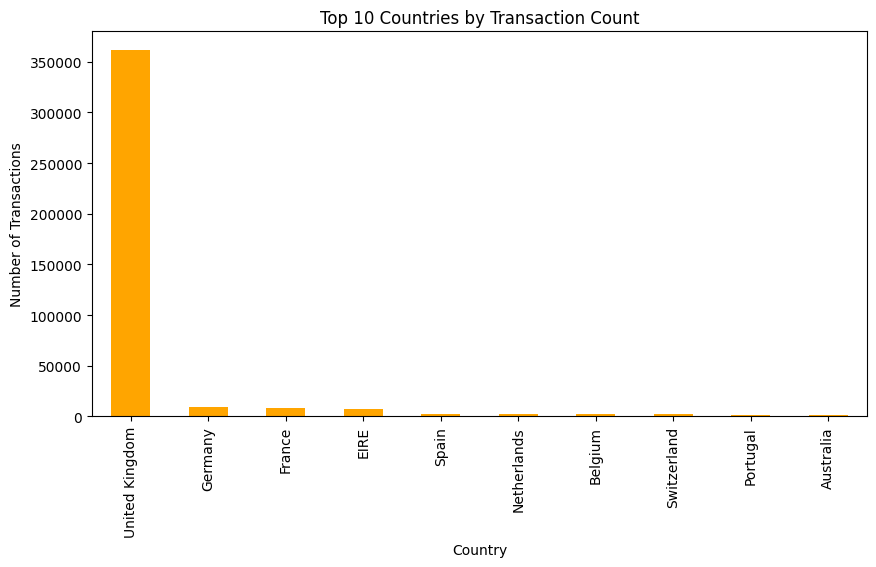

In [24]:
df['Country'].value_counts().head(10).plot(kind='bar', color='orange', figsize=(10,5))
plt.title('Top 10 Countries by Transaction Count')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.show()

Insight:
UK dominates in transactions,as it has significant no. of transactions as compared to other countries ,
 but other countries like Netherlands, Germany, France follow — useful for region-wise customer segmentation.



# Monthly sales trend

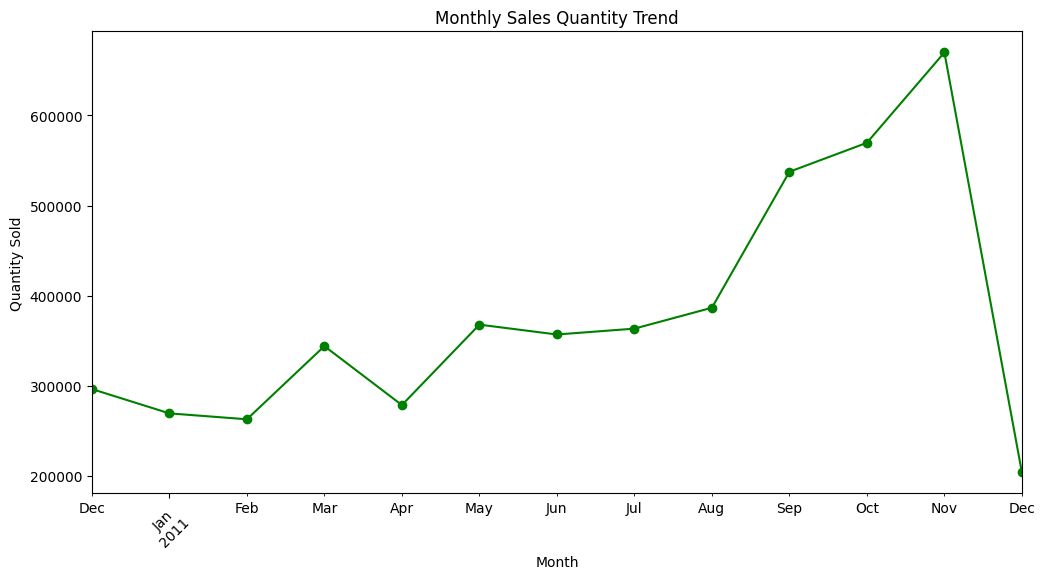

In [25]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['MonthYear'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('MonthYear')['Quantity'].sum()
monthly_sales.plot(kind='line', marker='o', figsize=(12,6), color='green')
plt.title('Monthly Sales Quantity Trend')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()


 Insightful peak: November is strongest

Steep drop: December likely has missing or incomplete data

Slower months: Jan–Feb

Growth period: August to November



# Revenue by country

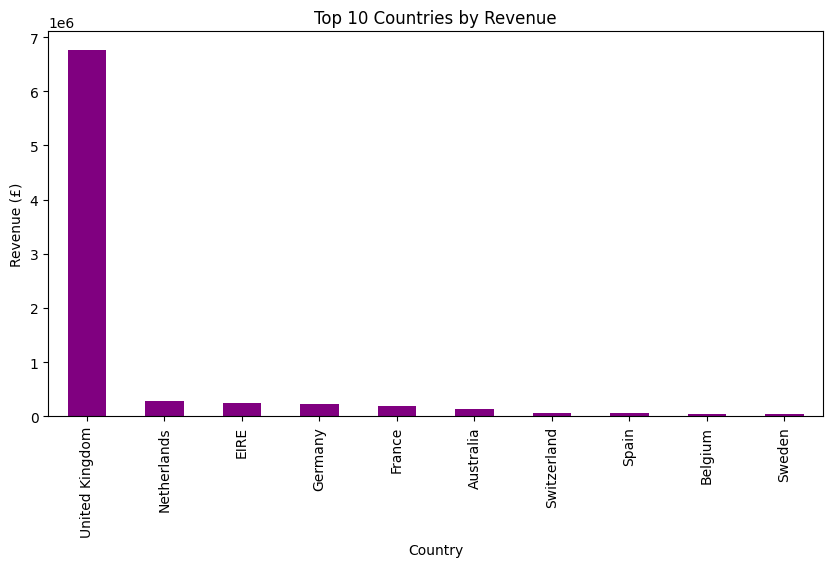

In [26]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
revenue_by_country = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)
revenue_by_country.plot(kind='bar', figsize=(10,5), color='purple')
plt.title('Top 10 Countries by Revenue')
plt.ylabel('Revenue (£)')
plt.xlabel('Country')
plt.show()


UK has highest revenue followed by Netherlands and Eire

---



# Correlation heatmap

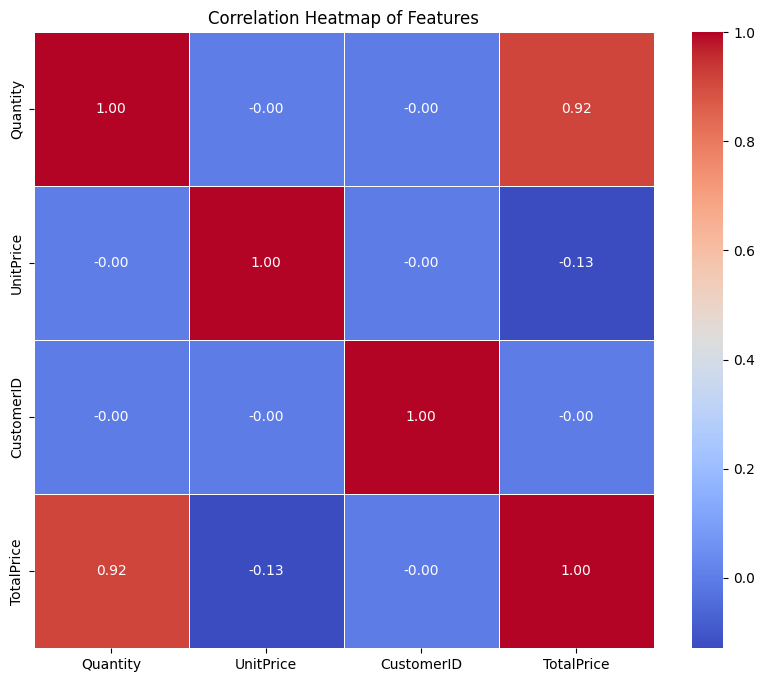

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Select only numeric columns (important for correlation)
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Step 2: Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Step 3: Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()


# SCALE THE DATA

In [28]:
from sklearn.preprocessing import StandardScaler

X = df.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# APPLYING MODELS FOR CLUSTERING

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN


In [30]:
# Replace df with your actual dataset
# Use only numerical columns
X = df.select_dtypes(include=['float64', 'int64'])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# K MEANS CLUSTERING

In [31]:
kmeans= KMeans(n_clusters=15, init= 'k-means++',max_iter=300, n_init=1)
kmeans.fit(X)

KMeans(n_clusters=15, n_init=1)

ELBOW PLOT CODE

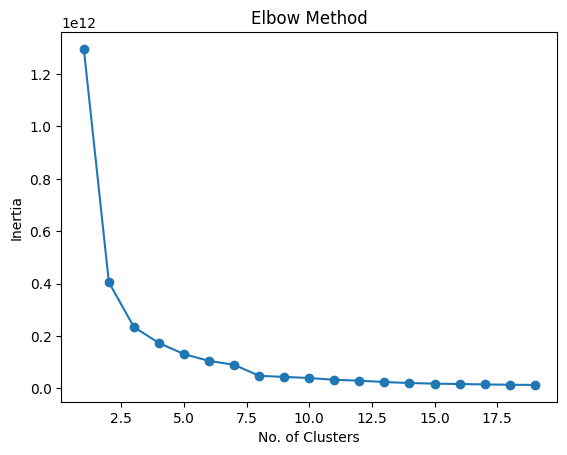

In [32]:
inertia = []
for k in range(1, 20):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)

plt.plot(range(1, 20), inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("No. of Clusters")
plt.ylabel("Inertia")
plt.show()


calculating silhaoutte score

In [33]:
from sklearn.metrics import silhouette_score
import numpy as np

sample_size = 10000  # Reduce this further if still slow
indices = np.random.choice(len(X), size=sample_size, replace=False)

# Use iloc for row-based indexing
X_sample = X.iloc[indices]
labels_sample = kmeans.labels_[indices]

print("Silhouette Score (sampled):", silhouette_score(X_sample, labels_sample))


Silhouette Score (sampled): 0.5344809369581907


**Predicting**

In [34]:
#predict the labels of clusters.
label = kmeans.fit_predict(X)

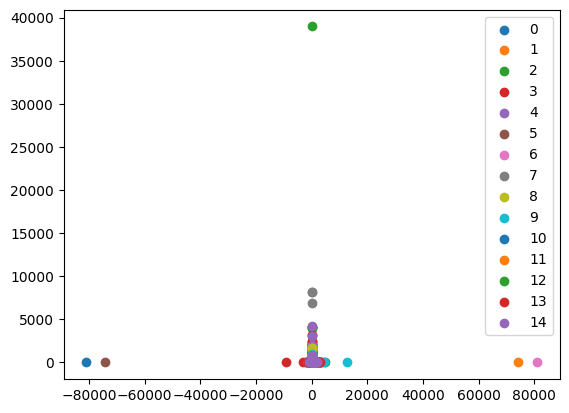

In [35]:
X_np = X.values  # or X.to_numpy()
u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(X_np[label == i, 0], X_np[label == i, 1], label=i)

plt.rcParams["figure.figsize"] = (20,8)
plt.legend()
plt.show()


**we now assign our clusters in our dataset by creating a new column "clusters"**

In [36]:
# Assigning clusters to our data
df['clusters'] = kmeans.labels_

In [37]:
# checking how it is working
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,MonthYear,TotalPrice,clusters
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,15.30,4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,22.00,4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,4


In [38]:
# Add cluster label to your DataFrame
df['Cluster'] = label

# Mean of each feature per cluster
cluster_summary = df.groupby('Cluster').mean(numeric_only=True)
print(cluster_summary)


             Quantity     UnitPrice    CustomerID     TotalPrice  clusters
Cluster                                                                   
0           10.159371      2.909202  16811.224340      16.218467       0.0
1           13.287007      3.690997  13984.622900      23.086659       1.0
2           14.731105      4.667202  12641.806998      25.313484       2.0
3            9.871224      3.289986  15584.450128      17.582993       3.0
4           10.568978      3.086581  17932.632176      20.734604       4.0
5       -74215.000000      1.040000  12346.000000  -77183.600000       5.0
6        80995.000000      2.080000  16446.000000  168469.600000       6.0
7           11.877930      3.467716  16198.925040      18.956230       7.0
8           11.173577      3.413208  15001.371465      20.232272       8.0
9           12.265530      3.019564  13275.900320      19.445377       9.0
10      -80995.000000      2.080000  16446.000000 -168469.600000      10.0
11       74215.000000    

In [39]:
print(df['Cluster'].value_counts())


Cluster
4     45065
2     44958
1     42978
13    42581
9     41001
0     40666
3     40093
8     38542
14    35788
7     35152
11        1
5         1
12        1
6         1
10        1
Name: count, dtype: int64


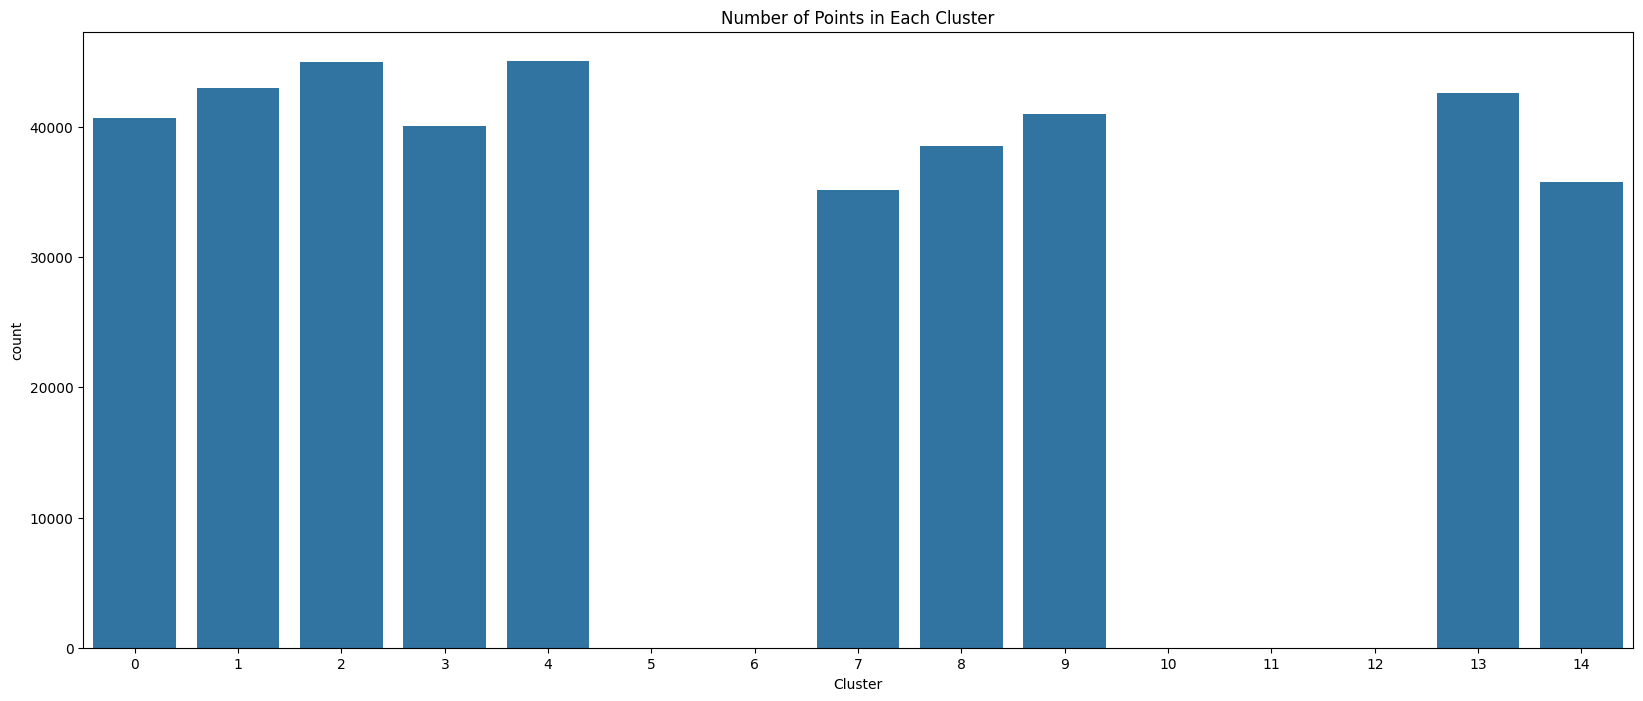

In [40]:
import seaborn as sns
sns.countplot(x='Cluster', data=df)
plt.title("Number of Points in Each Cluster")
plt.show()


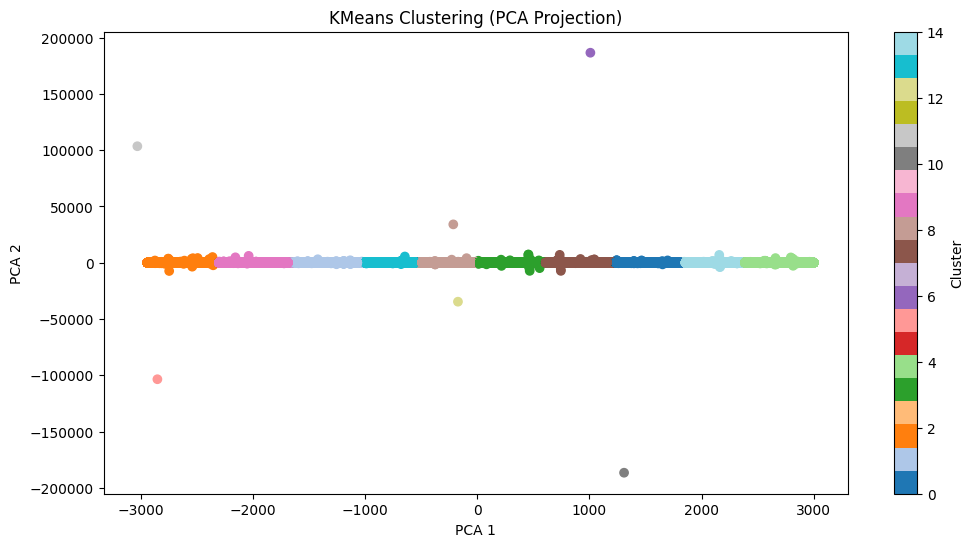

In [41]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_np)

plt.figure(figsize=(12,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=label, cmap='tab20')
plt.title('KMeans Clustering (PCA Projection)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()


# DB SCAN CLUSTERING

In [42]:
# Sample only a subset (3000 rows) to reduce memory usage
df_sample = df.sample(n=3000, random_state=42)

# Select numeric columns and scale
X = df_sample.select_dtypes(include='number').fillna(df.mean(numeric_only=True))
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)


Cluster Counts:
Cluster_DBSCAN
-1     184
 0     326
 1     486
 2     287
 3     227
 4     307
 5     267
 6     273
 7     291
 8     333
 9       4
 10      5
 11      5
 12      5
Name: count, dtype: int64
Silhouette Score: 0.456


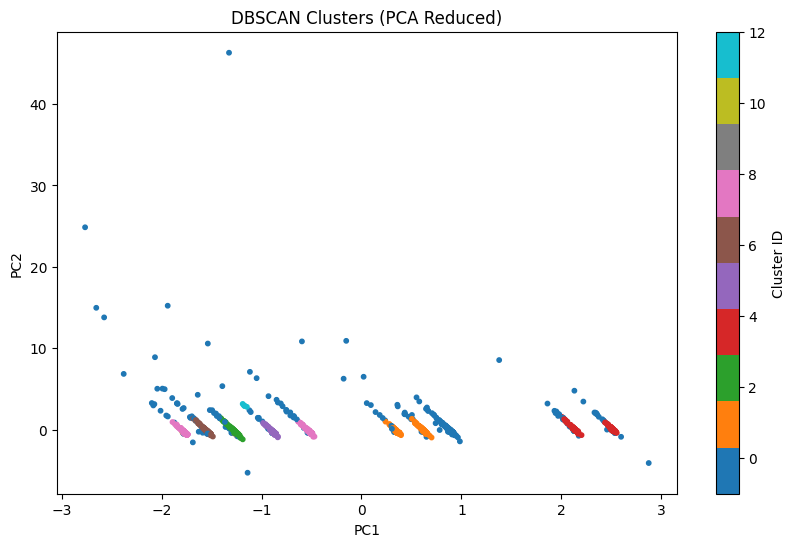

In [43]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Apply DBSCAN on sampled, scaled data
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_db = dbscan.fit_predict(X_scaled)

# Add to sampled dataframe
df_sample['Cluster_DBSCAN'] = labels_db

# Print counts
print("Cluster Counts:")
print(df_sample['Cluster_DBSCAN'].value_counts().sort_index())

# Silhouette Score (excluding noise)
core_mask = labels_db != -1
if core_mask.sum() > 1:
    score = silhouette_score(X_scaled[core_mask], labels_db[core_mask])
    print(f"Silhouette Score: {score:.3f}")
else:
    print("Not enough core points to calculate silhouette.")

# PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_db, cmap='tab10', s=10)
plt.title('DBSCAN Clusters (PCA Reduced)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster ID')
plt.show()


In [44]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.4, min_samples=5)
labels = dbscan.fit_predict(X_scaled)


silhoutte score

In [45]:
from sklearn.metrics import silhouette_score

mask = labels != -1  # exclude noise
if mask.sum() > 1:
    print("Silhouette Score:", silhouette_score(X_scaled[mask], labels[mask]))
else:
    print("Not enough clusters to calculate Silhouette Score.")


Silhouette Score: 0.453234421451487


In [46]:
df_sample['Cluster_DBSCAN'] = labels


In [47]:
print(df_sample['Cluster_DBSCAN'].value_counts().sort_index())


Cluster_DBSCAN
-1     234
 0     322
 1     234
 2     275
 3     226
 4     303
 5     266
 6     264
 7     241
 8     285
 9     323
 10      6
 11      6
 12      5
 13      5
 14      5
Name: count, dtype: int64


dbscan with pca

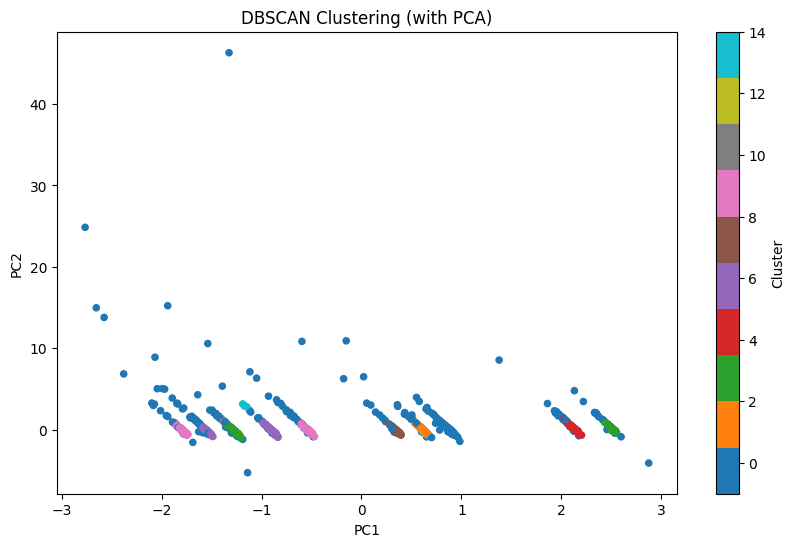

In [48]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', s=20)
plt.title('DBSCAN Clustering (with PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.show()


Find Optimal eps with k-NN Distance Plot

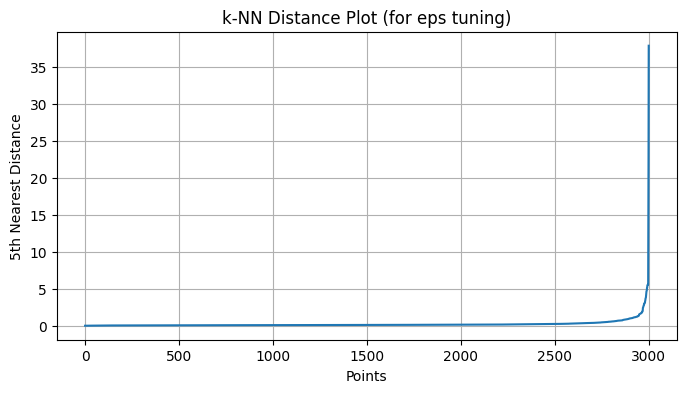

In [49]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Sort distances of 5th nearest neighbor
distances = np.sort(distances[:, 4])
plt.figure(figsize=(8,4))
plt.plot(distances)
plt.title('k-NN Distance Plot (for eps tuning)')
plt.xlabel('Points')
plt.ylabel('5th Nearest Distance')
plt.grid(True)
plt.show()


find noise points

In [50]:
noise_points = df_sample[df_sample['Cluster_DBSCAN'] == -1]
print(f"Noise points: {len(noise_points)}")


Noise points: 234


 List of All Unique Cluster Labels

In [51]:
np.unique(labels)  # includes -1 (noise)


array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

# AGGLOMERATIVE CLUSTERING

DENDOGRAM

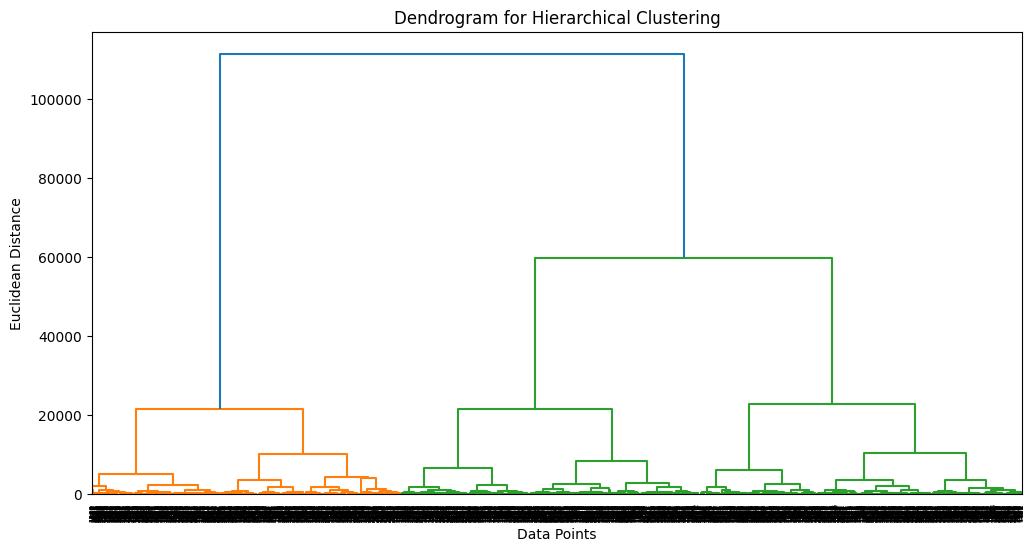

In [52]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()


APPLYING AGGLOMERATIVE CLUSTERING

In [53]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')  # You can adjust `n_clusters`
labels_hc = hc.fit_predict(X)


PLOT THE CLUSTERS

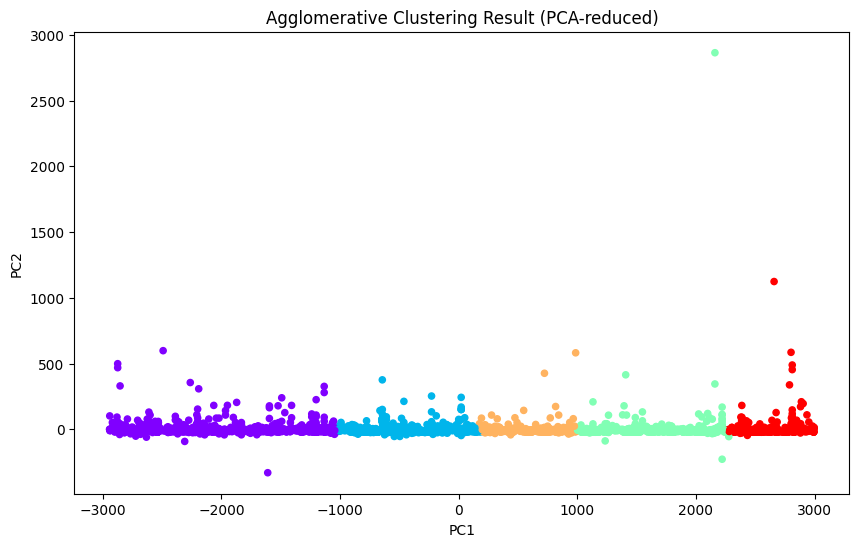

In [54]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_hc, cmap='rainbow', s=20)
plt.title("Agglomerative Clustering Result (PCA-reduced)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


SILHOUTTE SCORE

In [55]:
from sklearn.metrics import silhouette_score
import numpy as np

sample_size = min(10000, len(X))  # To avoid memory issues
indices = np.random.choice(len(X), size=sample_size, replace=False)

X_sample = X.iloc[indices] if hasattr(X, 'iloc') else X[indices]
labels_sample = labels_hc[indices]

score = silhouette_score(X_sample, labels_sample)
print("Silhouette Score (sampled):", score)


Silhouette Score (sampled): 0.5242602091564669


# OPTICS CLUSTERING

In [56]:
from sklearn.cluster import OPTICS
from sklearn.preprocessing import StandardScaler

# Standardize features first (if not done already)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply OPTICS
optics = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.05)
labels_optics = optics.fit_predict(X_scaled)


VISUALIZE OPTICS CLUSTERING

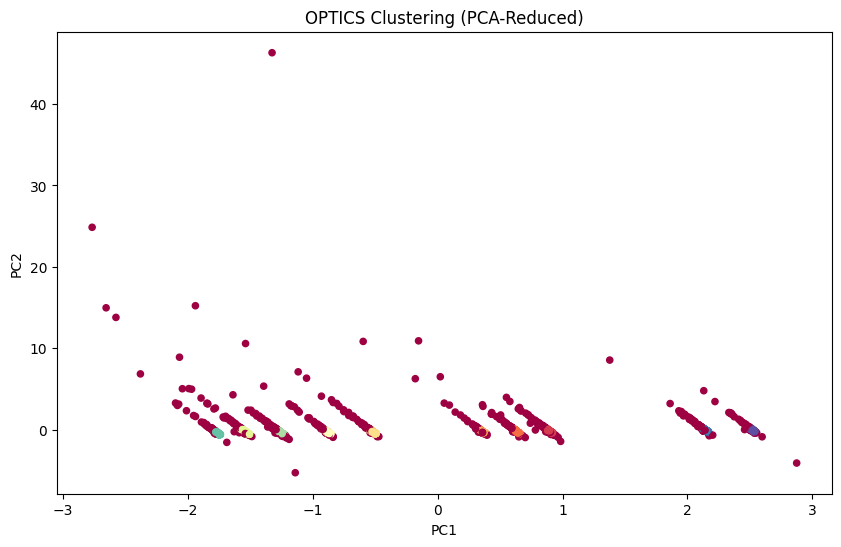

In [57]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_optics, cmap='Spectral', s=20)
plt.title("OPTICS Clustering (PCA-Reduced)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


NO. OF CKUSTER AND NOISE

In [58]:
n_clusters_optics = len(set(labels_optics)) - (1 if -1 in labels_optics else 0)
n_noise_optics = list(labels_optics).count(-1)

print("OPTICS - Estimated number of clusters:", n_clusters_optics)
print("OPTICS - Estimated number of noise points:", n_noise_optics)


OPTICS - Estimated number of clusters: 10
OPTICS - Estimated number of noise points: 1166


# GMM CLUSTERING

In [59]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# If not already scaled
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit the model with n components (clusters)
gmm = GaussianMixture(n_components=5, covariance_type='full', random_state=42)
gmm.fit(X_scaled)

# Predict cluster labels
labels_gmm = gmm.predict(X_scaled)


VISUALIZATION

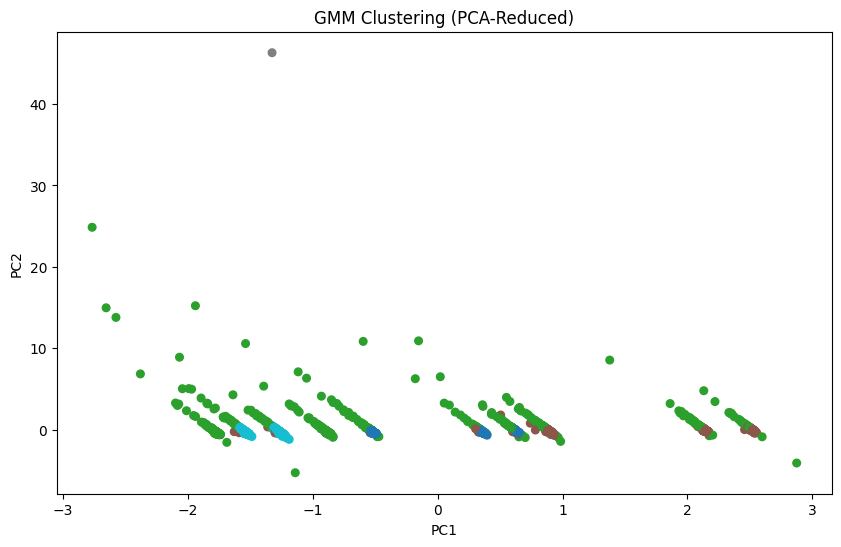

In [60]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensions for plotting
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Scatter plot with predicted labels
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_gmm, cmap='tab10', s=30)
plt.title("GMM Clustering (PCA-Reduced)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


SILHOUETTE SCORE

In [61]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_scaled, labels_gmm)
print("Silhouette Score (GMM):", round(score, 3))


Silhouette Score (GMM): 0.214


# CONCLUSION

What We Wanted to Do:
In this project, our main goal was to group similar data points together using unsupervised learning techniques — more specifically, clustering algorithms. These groups (called clusters) help us uncover hidden patterns, which can be extremely useful in real-world applications like customer segmentation, behavior analysis, or targeted marketing.


What We Did:
We explored four major clustering techniques — each with a different way of organizing the data:


KMeans Clustering

Agglomerative (Hierarchical) Clustering

DBSCAN (Density-Based Clustering)

GMM (Gaussian Mixture Models)

We also used PCA to reduce the number of features, making the data easier to visualize in 2D.


To measure how well the clusters were formed, we used the Silhouette Score, which tells us whether points in one cluster are well separated from others.


What We Observed:
 KMeans Clustering:
Gave us clear, balanced clusters.

Performed well with a high silhouette score (~0.53).

Best when clusters are nicely spread out in all directions.



Agglomerative Clustering:
Helped us understand hierarchical relationships.

The dendrogram was especially useful in visualizing how clusters form step by step.

Slightly more  silhoutte score for this specific data set.

 DBSCAN:
Detected outliers and noise automatically.

Worked better when clusters were of uneven shapes or densities.

Didn’t form as many distinct clusters, but it was good at filtering unusual data.

GMM (Gaussian Mixture Models):
Allowed data points to belong to multiple clusters with probabilities.

Very flexible — good for overlapping clusters.

Results were very similar to KMeans, but with more advanced interpretation.

 OPTICS: offered the flexibility to detect clusters of varying density and shape. Unlike DBSCAN, it didn’t force a fixed threshold and instead allowed us to visually analyze the reachability plot to discover clusters. It stood out as a more adaptive approach, especially when the data did not follow uniform density.


 What We Learned:
KMeans and GMM were the most effective overall in separating the data into meaningful groups.

Agglomerative Clustering was helpful for visual learning and gave us more insight into the cluster-building process and give slightly better silhouette score.

DBSCAN stood out for its ability to detect noise or rare behavior, even though it wasn’t the best at forming multiple clusters.

 final Conclusion:
Each clustering method gave us different insights, and together, they helped us understand the hidden structure of the data. If we were working with a business, we could now use these clusters to target different customer types, personalize strategies, or detect fraud or unusual patterns.

